# SNI: 
# https://conacyt.mx/sistema-nacional-de-investigadores/archivo-historico/
CVU', 'NOBILIS', 'NOMBRE DEL INVESTIGADOR(A)', 'CATEGORÍA',
       'ÁREA DEL CONOCIMIENTO', 'DISCIPLINA', 'SUBDISCIPLINA',
       'ESPECIALIDAD', 'INSTITUCIÓN DE ADSCRIPCIÓN', 'DEPENDENCIA ',
       'ENTIDAD FEDERATIVA', 'PAÍS', 'ESTÍMULO ECONÓMICO'], dtype=object

| Variable	| Definition |	Key |
| --- | --- | --- |
| NOBILIS | Sex|	0 = male, 1 = female |
| CATEGORÍA | C = 0, 1 , 2 , 3 | 
| ÁREA DEL CONOCIMIENTO | "I.- FÍSICO-MATEMÁTICAS Y CIENCIAS DE LA TIERRA"=1 
|                       | "II.- BIOLOGÍA Y QUÍMICA" = 2 |
|                       | "III.- MEDICINA Y CIENCIAS DE LA SALUD" = 3|
|                       | "IV.- HUMANIDADES Y CIENCIAS DE LA CONDUCTA" = 4|
|                       | "V.- CIENCIAS SOCIALES" = 5 |
|                       | "VI.- BIOTECNOLOGÍA Y CIENCIAS AGROPECUARIAS" = 6 |
|                       | "VII.- INGENIERÍAS" = 7 |


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
#import lux

In [2]:
#https://conacyt.mx/sistema-nacional-de-investigadores/archivo-historico/
mainpath = "datasets/" #carpeta global
filename = "SNI2021.xlsx" #dataset
fullpath = os.path.join(mainpath, filename)
df = pd.read_excel(fullpath)
df

,CVU,NOBILIS,NOMBRE DEL INVESTIGADOR(A),CATEGORÍA,ÁREA DEL CONOCIMIENTO,DISCIPLINA,SUBDISCIPLINA,ESPECIALIDAD,INSTITUCIÓN DE ADSCRIPCIÓN,DEPENDENCIA,ENTIDAD FEDERATIVA,PAÍS,ESTÍMULO ECONÓMICO
0,319951,DR.,"AALI BUJARI, ALI",1,V.- CIENCIAS SOCIALES,CIENCIAS ECONOMICAS,TEORIA ECONOMICA,CRECIMIENTO Y DESARROLLO ECONOMICO,UNIVERSIDAD AUTONOMA DEL ESTADO DE HIDALGO,INSTITUTO DE CIENCIAS ECONOMICO ADMINISTRATIVAS,HIDALGO,MÉXICO,La entrega del estímulo económico está sujeto ...
1,740915,DRA.,"AANSTANT, CHLOE LUCIENNE MARGUERITE",1,V.- CIENCIAS SOCIALES,SOCIOLOGIA,PROBLEMAS SOCIALES,"GENERO, SEXUALIDAD, MIGRACION, CARCEL",FACULTAD LATINOAMERICANA DE CIENCIAS SOCIALES,NaN,CIUDAD DE MÉXICO,MÉXICO,NaN
2,372329,DR.,"AARLAND, RAYN CLARENC",1,VI.- BIOTECNOLOGÍA Y CIENCIAS AGROPECUARIAS,CIENCIAS AGRONOMICAS Y VETERINARIAS,QUIMICA AGRONOMICA,"METABOLITOS SECUNDARIOS, CAPACIDAD ANTIOXIDANT...",UNIVERSIDAD DE GUADALAJARA,CENTRO UNIVERSITARIO DE LA CIENEGA,JALISCO,MÉXICO,NaN
3,417323,DR.,"ABAD JAVIER, MARIO EDUARDO",C,VII.- INGENIERÍAS,CIENCIAS TECNOLOGICAS,TECNOLOGIA DE MATERIALES,ANDAMIOS BIOMIMETICOS E INGENIERIA DE TEJIDO,TECNOLOGICO NACIONAL DE MEXICO,INSTITUTO TECNOLOGICO DE MORELIA,MICHOACÁN DE OCAMPO,MÉXICO,NaN
4,39601,DR.,"ABAD ZAVALETA, JOSE",1,VI.- BIOTECNOLOGÍA Y CIENCIAS AGROPECUARIAS,CIENCIAS AGRONOMICAS Y VETERINARIAS,CIENCIAS VETERINARIAS,REPRODUCCION Y GENETICA ANIMAL,UNIVERSIDAD DEL PAPALOAPAN,CAMPUS TUXTEPEC,OAXACA,MÉXICO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35173,420940,DRA.,"ZURITA MENDEZ, NANCY NELLY",C,II.- BIOLOGÍA Y QUÍMICA,QUIMICA,QUIMICA GENERAL,SINTESIS QUIMICA Y PROPIEDADES DE LOS MATERIALES,UNIVERSIDAD MICHOACANA DE SAN NICOLAS DE HIDALGO,NaN,MICHOACÁN DE OCAMPO,MÉXICO,NaN
35174,6614,DR.,"ZURITA ORTEGA, MARIO ENRIQUE",3,II.- BIOLOGÍA Y QUÍMICA,CIENCIAS DE LA VIDA,BIOLOGIA MOLECULAR,GENETICA Y BIOLOGIA DEL DESARROLLO,UNIVERSIDAD NACIONAL AUTONOMA DE MEXICO,INSTITUTO DE BIOTECNOLOGIA,MORELOS,MÉXICO,NaN
35175,121429,DRA.,"ZURITA RIVERA, URSULA DEL CARMEN",1,V.- CIENCIAS SOCIALES,SOCIOLOGIA,SOCIOLOGIA DE ACTIVIDADES PARTICULARES,SOCIOLOGIA DE LA EDUCACION Y SOCIOLOGIA POLITICA,FACULTAD LATINOAMERICANA DE CIENCIAS SOCIALES,SEDE ACADEMICA DE MEXICO,CIUDAD DE MÉXICO,MÉXICO,NaN
35176,82128,DR.,"ZURITA SANCHEZ, JORGE ROBERTO",1,I.- FÍSICO-MATEMÁTICAS Y CIENCIAS DE LA TIERRA,FISICA,FISICA TEORICA,"CAMPOS ELECTROMAGNETICOS, NANO-OPTICA",INSTITUTO NACIONAL DE ASTROFISICA OPTICA Y ELE...,COORDINACION DE ELECTRONICA,PUEBLA,MÉXICO,NaN


In [3]:
df.columns.values
#data.shape

array(['CVU', 'NOBILIS', 'NOMBRE DEL INVESTIGADOR(A)', 'CATEGORÍA',
       'ÁREA DEL CONOCIMIENTO', 'DISCIPLINA', 'SUBDISCIPLINA',
       'ESPECIALIDAD', 'INSTITUCIÓN DE ADSCRIPCIÓN', 'DEPENDENCIA ',
       'ENTIDAD FEDERATIVA', 'PAÍS', 'ESTÍMULO ECONÓMICO'], dtype=object)

In [4]:
'''
Renombrar columnas: Bucle en los encabezados para :
1. Poner todo en minúsculas
2. Eliminar los espacios
3. Remplazar espacio entre palabras por "_"
'''

new_col_names = []

for name in df.columns:
    # Luego, pon todas las letras en minúsculas
    name_lowered = name.lower()
    # Elimina los espacios al principio y al final
    name_stripped = name_lowered.strip()
    # Por último, reemplaza los espacios entre palabras por guiones bajos
    name_no_spaces = name_stripped.replace(' ', '_')
    # Convertir todo a string
    name_string = str(name_no_spaces)
    # Agrega el nuevo nombre a la lista de nuevos nombres de columna
    new_col_names.append(name_string)
    

# Reemplaza los nombres anteriores por los nuevos
df.columns = new_col_names
#data['categoría'] = data['categoría'].astype(str)
df

,cvu,nobilis,nombre_del_investigador(a),categoría,área_del_conocimiento,disciplina,subdisciplina,especialidad,institución_de_adscripción,dependencia,entidad_federativa,país,estímulo_económico
0,319951,DR.,"AALI BUJARI, ALI",1,V.- CIENCIAS SOCIALES,CIENCIAS ECONOMICAS,TEORIA ECONOMICA,CRECIMIENTO Y DESARROLLO ECONOMICO,UNIVERSIDAD AUTONOMA DEL ESTADO DE HIDALGO,INSTITUTO DE CIENCIAS ECONOMICO ADMINISTRATIVAS,HIDALGO,MÉXICO,La entrega del estímulo económico está sujeto ...
1,740915,DRA.,"AANSTANT, CHLOE LUCIENNE MARGUERITE",1,V.- CIENCIAS SOCIALES,SOCIOLOGIA,PROBLEMAS SOCIALES,"GENERO, SEXUALIDAD, MIGRACION, CARCEL",FACULTAD LATINOAMERICANA DE CIENCIAS SOCIALES,NaN,CIUDAD DE MÉXICO,MÉXICO,NaN
2,372329,DR.,"AARLAND, RAYN CLARENC",1,VI.- BIOTECNOLOGÍA Y CIENCIAS AGROPECUARIAS,CIENCIAS AGRONOMICAS Y VETERINARIAS,QUIMICA AGRONOMICA,"METABOLITOS SECUNDARIOS, CAPACIDAD ANTIOXIDANT...",UNIVERSIDAD DE GUADALAJARA,CENTRO UNIVERSITARIO DE LA CIENEGA,JALISCO,MÉXICO,NaN
3,417323,DR.,"ABAD JAVIER, MARIO EDUARDO",C,VII.- INGENIERÍAS,CIENCIAS TECNOLOGICAS,TECNOLOGIA DE MATERIALES,ANDAMIOS BIOMIMETICOS E INGENIERIA DE TEJIDO,TECNOLOGICO NACIONAL DE MEXICO,INSTITUTO TECNOLOGICO DE MORELIA,MICHOACÁN DE OCAMPO,MÉXICO,NaN
4,39601,DR.,"ABAD ZAVALETA, JOSE",1,VI.- BIOTECNOLOGÍA Y CIENCIAS AGROPECUARIAS,CIENCIAS AGRONOMICAS Y VETERINARIAS,CIENCIAS VETERINARIAS,REPRODUCCION Y GENETICA ANIMAL,UNIVERSIDAD DEL PAPALOAPAN,CAMPUS TUXTEPEC,OAXACA,MÉXICO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35173,420940,DRA.,"ZURITA MENDEZ, NANCY NELLY",C,II.- BIOLOGÍA Y QUÍMICA,QUIMICA,QUIMICA GENERAL,SINTESIS QUIMICA Y PROPIEDADES DE LOS MATERIALES,UNIVERSIDAD MICHOACANA DE SAN NICOLAS DE HIDALGO,NaN,MICHOACÁN DE OCAMPO,MÉXICO,NaN
35174,6614,DR.,"ZURITA ORTEGA, MARIO ENRIQUE",3,II.- BIOLOGÍA Y QUÍMICA,CIENCIAS DE LA VIDA,BIOLOGIA MOLECULAR,GENETICA Y BIOLOGIA DEL DESARROLLO,UNIVERSIDAD NACIONAL AUTONOMA DE MEXICO,INSTITUTO DE BIOTECNOLOGIA,MORELOS,MÉXICO,NaN
35175,121429,DRA.,"ZURITA RIVERA, URSULA DEL CARMEN",1,V.- CIENCIAS SOCIALES,SOCIOLOGIA,SOCIOLOGIA DE ACTIVIDADES PARTICULARES,SOCIOLOGIA DE LA EDUCACION Y SOCIOLOGIA POLITICA,FACULTAD LATINOAMERICANA DE CIENCIAS SOCIALES,SEDE ACADEMICA DE MEXICO,CIUDAD DE MÉXICO,MÉXICO,NaN
35176,82128,DR.,"ZURITA SANCHEZ, JORGE ROBERTO",1,I.- FÍSICO-MATEMÁTICAS Y CIENCIAS DE LA TIERRA,FISICA,FISICA TEORICA,"CAMPOS ELECTROMAGNETICOS, NANO-OPTICA",INSTITUTO NACIONAL DE ASTROFISICA OPTICA Y ELE...,COORDINACION DE ELECTRONICA,PUEBLA,MÉXICO,NaN


In [5]:
# Calcular el número de valores ausentes
df.isna().sum()

cvu                               0
nobilis                           0
nombre_del_investigador(a)        0
categoría                         0
área_del_conocimiento             0
disciplina                       15
subdisciplina                   115
especialidad                   2723
institución_de_adscripción        0
dependencia                    2971
entidad_federativa                1
país                              1
estímulo_económico            35177
dtype: int64

In [6]:
# Contar duplicados explícitos
duplicates = df.duplicated().sum()
duplicates

0

In [7]:
print(pd.value_counts(df['nobilis'], sort = True))

DR.         21145
DRA.        13017
M. EN C.      577
MED.          309
MTRO.          48
MTRA.          26
QUIM.          14
BIOL.          13
LIC.           10
M.EN C.         3
ING.            3
FIS.            3
Q.F.B.          2
M. EN A.        1
PSIC.           1
M. EN I.        1
QUIM,.          1
M. EN B.        1
BIOQ.           1
QFB.            1
MED             1
Name: nobilis, dtype: int64


In [8]:
# Función para reemplazar duplicados implícitos
def replace_wrong_genres(data, column, wrong_genres, correct_genres): 
    for wrong in wrong_genres: # 
        df[column] = df[column].replace(wrong_genres, correct_genres) 
    return df 

In [9]:
# Eliminar duplicados implícitos
wrong_genres_0 = ['M. EN C.', 'M.EN C.', 'M. EN A.' , 'M. EN I.' , 'M. EN B.',] #lista de nombres mal escritos
name_0 = 'MC.' #genero correcto
df = replace_wrong_genres(df, 'nobilis', wrong_genres_0, name_0)
wrong_genres_1 = ['MED',] #lista de nombres mal escritos
name_1 = 'MED.' #genero correcto
df = replace_wrong_genres(df, 'nobilis', wrong_genres_1, name_1)
wrong_genres_2 = ['QUIM,.','Q.F.B.','QUIM,.','BIOQ.','QFB.'] #lista de nombres mal escritos
name_2 = 'QUIM.' #genero correcto
df = replace_wrong_genres(df, 'nobilis', wrong_genres_2, name_2)

print(pd.value_counts(df['nobilis'], sort = True))

DR.      21145
DRA.     13017
MC.        583
MED.       310
MTRO.       48
MTRA.       26
QUIM.       19
BIOL.       13
LIC.        10
ING.         3
FIS.         3
PSIC.        1
Name: nobilis, dtype: int64


In [10]:
print(pd.value_counts(df['área_del_conocimiento'], sort = True))

V.- CIENCIAS SOCIALES                             5937
II.- BIOLOGÍA Y QUÍMICA                           5295
I.- FÍSICO-MATEMÁTICAS Y CIENCIAS DE LA TIERRA    5153
IV.- HUMANIDADES Y CIENCIAS DE LA CONDUCTA        5045
VII.- INGENIERÍAS                                 4962
VI.- BIOTECNOLOGÍA Y CIENCIAS AGROPECUARIAS       4853
III.- MEDICINA Y CIENCIAS DE LA SALUD             3933
Name: área_del_conocimiento, dtype: int64


In [11]:
df.categoría = df.categoría.replace({"C": 0})
df.nobilis = df.nobilis.replace({"DR.":0, "DRA." : 1})
df["área_del_conocimiento"] = df["área_del_conocimiento"].replace({"I.- FÍSICO-MATEMÁTICAS Y CIENCIAS DE LA TIERRA":1, 
"II.- BIOLOGÍA Y QUÍMICA":2,"III.- MEDICINA Y CIENCIAS DE LA SALUD":3, "IV.- HUMANIDADES Y CIENCIAS DE LA CONDUCTA":4,"V.- CIENCIAS SOCIALES":5,"VI.- BIOTECNOLOGÍA Y CIENCIAS AGROPECUARIAS":6,"VII.- INGENIERÍAS":7})
df

,cvu,nobilis,nombre_del_investigador(a),categoría,área_del_conocimiento,disciplina,subdisciplina,especialidad,institución_de_adscripción,dependencia,entidad_federativa,país,estímulo_económico
0,319951,0,"AALI BUJARI, ALI",1,5,CIENCIAS ECONOMICAS,TEORIA ECONOMICA,CRECIMIENTO Y DESARROLLO ECONOMICO,UNIVERSIDAD AUTONOMA DEL ESTADO DE HIDALGO,INSTITUTO DE CIENCIAS ECONOMICO ADMINISTRATIVAS,HIDALGO,MÉXICO,La entrega del estímulo económico está sujeto ...
1,740915,1,"AANSTANT, CHLOE LUCIENNE MARGUERITE",1,5,SOCIOLOGIA,PROBLEMAS SOCIALES,"GENERO, SEXUALIDAD, MIGRACION, CARCEL",FACULTAD LATINOAMERICANA DE CIENCIAS SOCIALES,NaN,CIUDAD DE MÉXICO,MÉXICO,NaN
2,372329,0,"AARLAND, RAYN CLARENC",1,6,CIENCIAS AGRONOMICAS Y VETERINARIAS,QUIMICA AGRONOMICA,"METABOLITOS SECUNDARIOS, CAPACIDAD ANTIOXIDANT...",UNIVERSIDAD DE GUADALAJARA,CENTRO UNIVERSITARIO DE LA CIENEGA,JALISCO,MÉXICO,NaN
3,417323,0,"ABAD JAVIER, MARIO EDUARDO",0,7,CIENCIAS TECNOLOGICAS,TECNOLOGIA DE MATERIALES,ANDAMIOS BIOMIMETICOS E INGENIERIA DE TEJIDO,TECNOLOGICO NACIONAL DE MEXICO,INSTITUTO TECNOLOGICO DE MORELIA,MICHOACÁN DE OCAMPO,MÉXICO,NaN
4,39601,0,"ABAD ZAVALETA, JOSE",1,6,CIENCIAS AGRONOMICAS Y VETERINARIAS,CIENCIAS VETERINARIAS,REPRODUCCION Y GENETICA ANIMAL,UNIVERSIDAD DEL PAPALOAPAN,CAMPUS TUXTEPEC,OAXACA,MÉXICO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35173,420940,1,"ZURITA MENDEZ, NANCY NELLY",0,2,QUIMICA,QUIMICA GENERAL,SINTESIS QUIMICA Y PROPIEDADES DE LOS MATERIALES,UNIVERSIDAD MICHOACANA DE SAN NICOLAS DE HIDALGO,NaN,MICHOACÁN DE OCAMPO,MÉXICO,NaN
35174,6614,0,"ZURITA ORTEGA, MARIO ENRIQUE",3,2,CIENCIAS DE LA VIDA,BIOLOGIA MOLECULAR,GENETICA Y BIOLOGIA DEL DESARROLLO,UNIVERSIDAD NACIONAL AUTONOMA DE MEXICO,INSTITUTO DE BIOTECNOLOGIA,MORELOS,MÉXICO,NaN
35175,121429,1,"ZURITA RIVERA, URSULA DEL CARMEN",1,5,SOCIOLOGIA,SOCIOLOGIA DE ACTIVIDADES PARTICULARES,SOCIOLOGIA DE LA EDUCACION Y SOCIOLOGIA POLITICA,FACULTAD LATINOAMERICANA DE CIENCIAS SOCIALES,SEDE ACADEMICA DE MEXICO,CIUDAD DE MÉXICO,MÉXICO,NaN
35176,82128,0,"ZURITA SANCHEZ, JORGE ROBERTO",1,1,FISICA,FISICA TEORICA,"CAMPOS ELECTROMAGNETICOS, NANO-OPTICA",INSTITUTO NACIONAL DE ASTROFISICA OPTICA Y ELE...,COORDINACION DE ELECTRONICA,PUEBLA,MÉXICO,NaN


In [36]:
def number(df,categoría, área_del_conocimiento): 
  track_list = df.loc[(df.loc[:,'área_del_conocimiento'] == área_del_conocimiento)&(df.loc[:,'categoría'] == categoría)]
  count = 0
  #for row in track_list['cvu']:
  for index, row in track_list.iterrows():
        count += 1
  return count

In [13]:
#counts = df.groupby(['categoría', 'área_del_conocimiento']).size().reset_index(name='counts')
#print(counts)

In [37]:
col = ['área_del_conocimiento', 'C', 1, 2, 3]
areas = ['I.- FÍSICO-MATEMÁTICAS Y CIENCIAS DE LA TIERRA', 'II.- BIOLOGÍA Y QUÍMICA', 'III.- MEDICINA Y CIENCIAS DE LA SALUD', 'IV.- HUMANIDADES Y CIENCIAS DE LA CONDUCTA', 'V.- CIENCIAS SOCIALES', 'VI.- BIOTECNOLOGÍA Y CIENCIAS AGROPECUARIAS', 'VII.- INGENIERÍAS']

tracks = []

for i, area in enumerate(areas, 1):
    row = [area]
    for cat in range(4):
        row.append(number(df,área_del_conocimiento=i, categoría=cat))
    tracks.append(row)

tracks_final = pd.DataFrame(tracks, columns=col)

print('# de SNI por área de conocimiento:')
print(tracks_final)

# de SNI por área de conocimiento:
                            área_del_conocimiento     C     1    2    3
0  I.- FÍSICO-MATEMÁTICAS Y CIENCIAS DE LA TIERRA  1189  2338  956  670
1                         II.- BIOLOGÍA Y QUÍMICA  1148  2775  872  500
2           III.- MEDICINA Y CIENCIAS DE LA SALUD   769  2132  648  384
3      IV.- HUMANIDADES Y CIENCIAS DE LA CONDUCTA  1508  2517  695  325
4                           V.- CIENCIAS SOCIALES  1950  2741  829  417
5     VI.- BIOTECNOLOGÍA Y CIENCIAS AGROPECUARIAS  1388  2773  475  217
6                               VII.- INGENIERÍAS  1216  3075  493  178


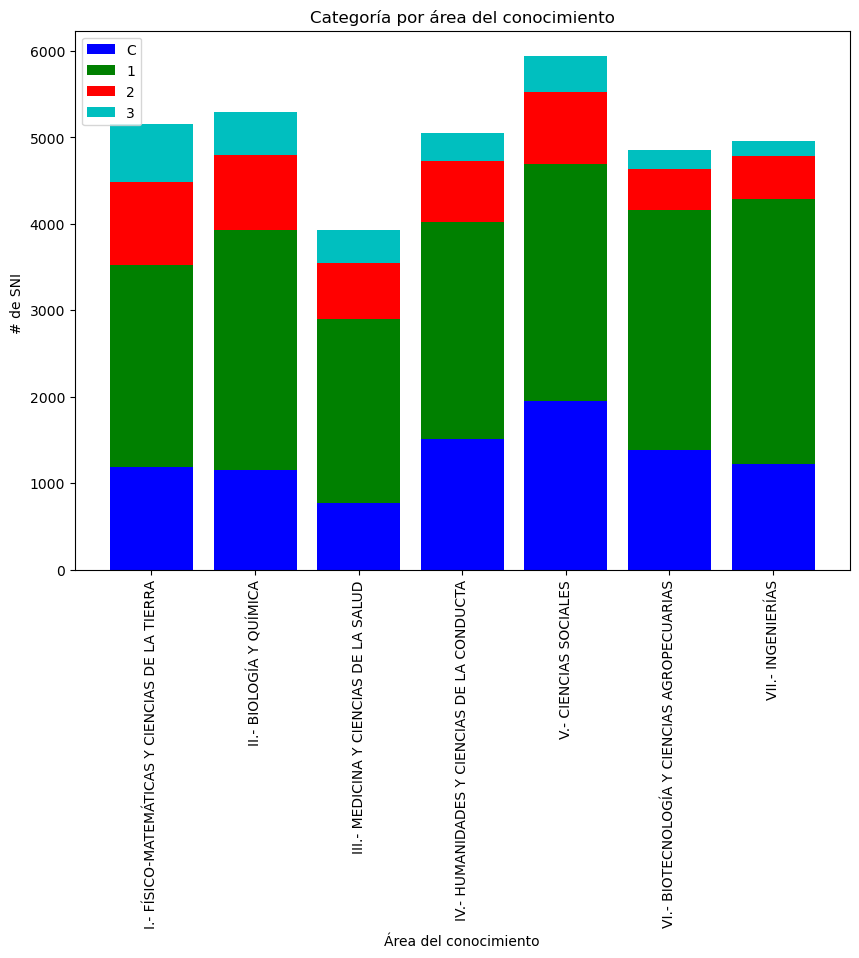

In [38]:
# Asegúrate de que las columnas numéricas sean de tipo float
for column in tracks_final.columns[1:]:
    tracks_final[column] = tracks_final[column].astype(float)

# Preparar los datos para el gráfico de barras apiladas
bottom = np.zeros(len(tracks_final))
colors = ['b', 'g', 'r', 'c']

# Crear el gráfico de barras apiladas
plt.figure(figsize=(10, 7))
for i, column in enumerate(tracks_final.columns[1:]):
    plt.bar(tracks_final['área_del_conocimiento'], tracks_final[column], bottom=bottom, color=colors[i])
    bottom += tracks_final[column]

# Añadir leyendas y títulos
plt.title('Categoría por área del conocimiento')
plt.xlabel('Área del conocimiento')
plt.ylabel('# de SNI ')
plt.legend(tracks_final.columns[1:], loc='upper left')
plt.xticks(rotation=90)
# Mostrar el gráfico
plt.show()

In [30]:
male = df[df['nobilis'] == 0]
female = df[df['nobilis'] == 1]

In [74]:
col = ['área_del_conocimiento', 'C', 1, 2, 3]
areas = ['I.- FÍSICO-MATEMÁTICAS Y CIENCIAS DE LA TIERRA', 'II.- BIOLOGÍA Y QUÍMICA', 'III.- MEDICINA Y CIENCIAS DE LA SALUD', 'IV.- HUMANIDADES Y CIENCIAS DE LA CONDUCTA', 'V.- CIENCIAS SOCIALES', 'VI.- BIOTECNOLOGÍA Y CIENCIAS AGROPECUARIAS', 'VII.- INGENIERÍAS']

tracks = []

for i, area in enumerate(areas, 1):
    row = [area]
    for cat in range(4):
        row.append(number(male,área_del_conocimiento=i, categoría=cat))
    tracks.append(row)

tracks_final_m= pd.DataFrame(tracks, columns=col)

print('# de SNI por área de conocimiento hombre:')
print(tracks_final_m)

tracks = []

for i, area in enumerate(areas, 1):
    row = [area]
    for cat in range(4):
        row.append(number(female,área_del_conocimiento=i, categoría=cat))
    tracks.append(row)

tracks_final_f = pd.DataFrame(tracks, columns=col)

print('# de SNI por área de conocimiento :')
print(tracks_final_f)


# de SNI por área de conocimiento hombre:
                            área_del_conocimiento     C     1    2    3
0  I.- FÍSICO-MATEMÁTICAS Y CIENCIAS DE LA TIERRA   802  1764  792  591
1                         II.- BIOLOGÍA Y QUÍMICA   567  1467  527  365
2           III.- MEDICINA Y CIENCIAS DE LA SALUD   248   779  250  211
3      IV.- HUMANIDADES Y CIENCIAS DE LA CONDUCTA   699  1272  375  173
4                           V.- CIENCIAS SOCIALES  1007  1614  512  286
5     VI.- BIOTECNOLOGÍA Y CIENCIAS AGROPECUARIAS   744  1785  328  175
6                               VII.- INGENIERÍAS   881  2352  415  164
# de SNI por área de conocimiento :
                            área_del_conocimiento    C     1    2    3
0  I.- FÍSICO-MATEMÁTICAS Y CIENCIAS DE LA TIERRA  381   554  160   79
1                         II.- BIOLOGÍA Y QUÍMICA  576  1230  337  132
2           III.- MEDICINA Y CIENCIAS DE LA SALUD  374   877  259  110
3      IV.- HUMANIDADES Y CIENCIAS DE LA CONDUCTA  804  1240  

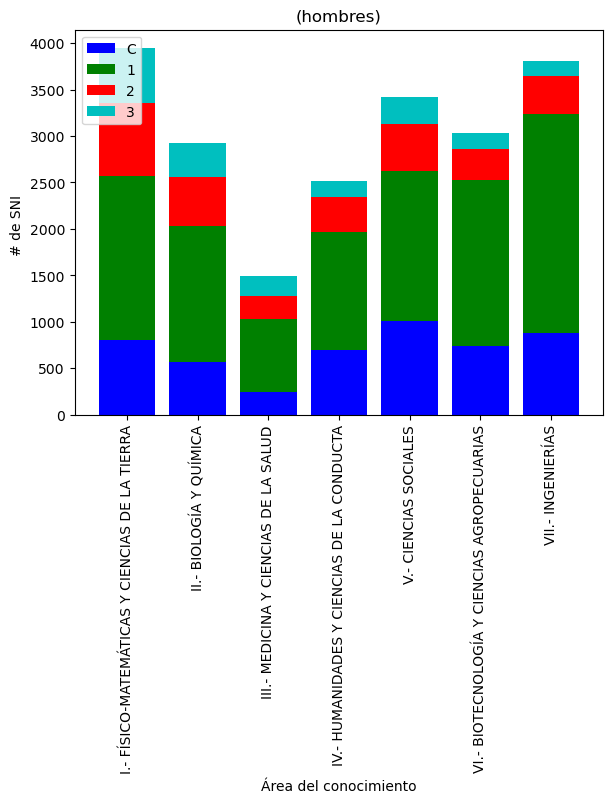

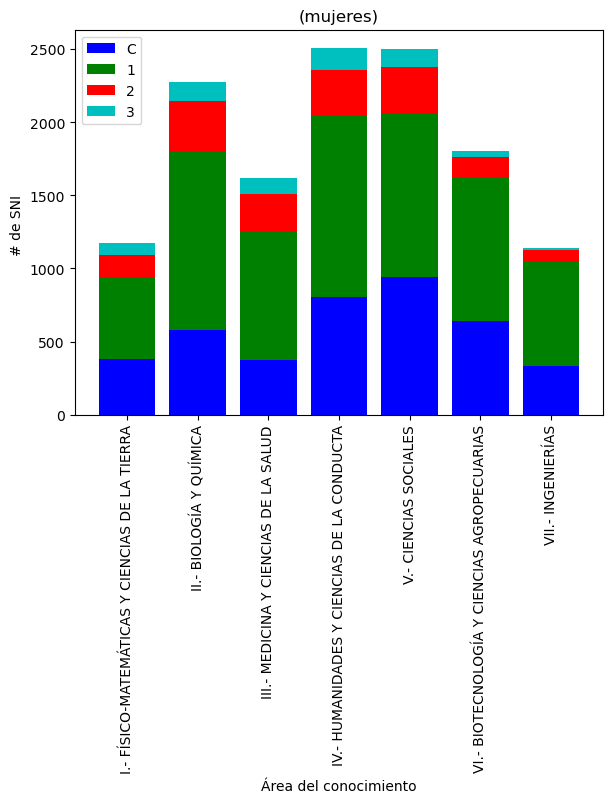

In [75]:

# Asegúrate de que las columnas numéricas sean de tipo float
for column in tracks_final_m.columns[1:]:
    tracks_final_m[column] = tracks_final_m[column].astype(float)

# Preparar los datos para el gráfico de barras apiladas
bottom = np.zeros(len(tracks_final_m))
colors = ['b', 'g', 'r', 'c']


# Crear el gráfico de barras apiladas
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
for i, column in enumerate(tracks_final_m.columns[1:]):
    plt.bar(tracks_final_m['área_del_conocimiento'], tracks_final_m[column], bottom=bottom, color=colors[i])
    bottom += tracks_final_m[column]
# Añadir leyendas y títulos
plt.title('(hombres)')
plt.xlabel('Área del conocimiento')
plt.ylabel('# de SNI ')
plt.legend(tracks_final_m.columns[1:], loc='upper left')
plt.xticks(rotation=90)

# Asegúrate de que las columnas numéricas sean de tipo float
for column in tracks_final_f.columns[1:]:
    tracks_final_f[column] = tracks_final_f[column].astype(float)

# Preparar los datos para el gráfico de barras apiladas
bottom = np.zeros(len(tracks_final_f))
colors = ['b', 'g', 'r', 'c']

# Crear el gráfico de barras apiladas
plt.figure(figsize=(15, 5))
plt.subplot(1,2,2)
for i, column in enumerate(tracks_final_f.columns[1:]):
    plt.bar(tracks_final_f['área_del_conocimiento'], tracks_final_f[column], bottom=bottom, color=colors[i])
    bottom += tracks_final_f[column]
# Añadir leyendas y títulos
plt.title('(mujeres)')
plt.xlabel('Área del conocimiento')
plt.ylabel('# de SNI ')
plt.legend(tracks_final_f.columns[1:], loc='upper left')
plt.xticks(rotation=90)
# Mostrar el gráfico
# Mostrar el gráfico
plt.show()